Root Mean Squared Error: 0.92
R² Score: 0.96
Predicted price for example car: 7.25 lakhs


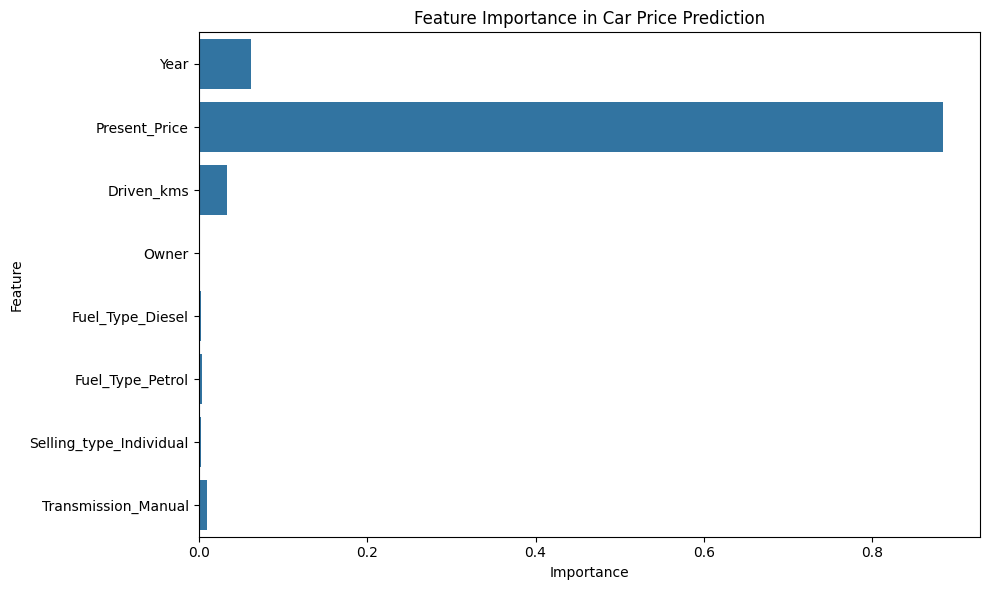

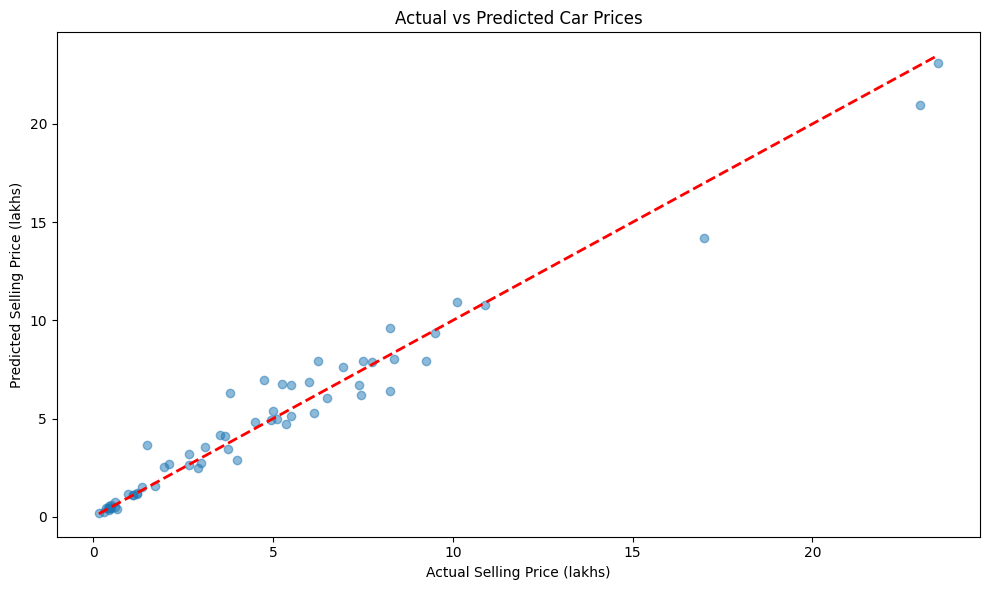

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('car_data.csv')

# Data preprocessing
# Define features and target
X = data[['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']]
y = data['Selling_Price']

# Define categorical and numerical columns
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']
numerical_features = ['Year', 'Present_Price', 'Driven_kms', 'Owner']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Create model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Function to predict price for a new car
def predict_car_price(year, present_price, driven_kms, fuel_type, selling_type, transmission, owner):
    input_data = pd.DataFrame({
        'Year': [year],
        'Present_Price': [present_price],
        'Driven_kms': [driven_kms],
        'Fuel_Type': [fuel_type],
        'Selling_type': [selling_type],
        'Transmission': [transmission],
        'Owner': [owner]
    })
    prediction = model.predict(input_data)
    return prediction[0]

# Example prediction
example_price = predict_car_price(
    year=2015,
    present_price=10.0,
    driven_kms=30000,
    fuel_type='Petrol',
    selling_type='Dealer',
    transmission='Manual',
    owner=0
)
print(f"Predicted price for example car: {example_price:.2f} lakhs")

# Feature importance visualization
feature_names = numerical_features + list(model.named_steps['preprocessor']
                                        .named_transformers_['cat']
                                        .get_feature_names_out(categorical_features))
importances = model.named_steps['regressor'].feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance in Car Price Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Selling Price (lakhs)')
plt.ylabel('Predicted Selling Price (lakhs)')
plt.title('Actual vs Predicted Car Prices')
plt.tight_layout()
plt.show()